In [36]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


Generating the data 



  features, output = make_classification(n_samples = ,
                                       n_features = ,
                                       n_informative = ,
                                       n_redundant = ,
                                       n_classes = ,
                                       weights = , 
* n_samples: It signifies the number of samples(row) we want in our dataset. 
* n_features: It signifies the number of features(columns) we want in our dataset. 
* n_informative: It is used to set the number of informative class. 
* n_redundant : It is used to set number of redundant features. 
* n_classes : This signifies the number of classes in target dataset.                                         
                                         


In [3]:
features, output = make_classification(n_samples = 1000,
                                       n_features = 5,
                                       n_informative = 5,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.2, .3])
print()
print("Target Class: ");
print(pd.DataFrame(output, columns=["TargetClass"]).head())
print("Feature Matrix: ");


Target Class: 
   TargetClass
0            1
1            0
2            1
3            1
4            1
Feature Matrix: 


In [4]:
x1=features[:, 0]
x2=features[:, 1]
x3=features[:, 2]
x4=features[:, 3]
x5=features[:, 4]
y=output
df = pd.DataFrame(np.column_stack([x1, x2, x3, x4, x5, y ]), columns = ["x1", "x2", "x3", "x4", "x5", "y"])
df.head()

,x1,x2,x3,x4,x5,y
0,-0.750209,0.952232,-0.411209,0.825448,-1.043812,1.0
1,2.962122,1.301229,1.593110,-0.701459,0.731253,0.0
2,-1.579744,1.296168,0.323091,0.092658,-0.336702,1.0
3,0.542901,1.266757,-0.731917,1.186217,-0.088583,1.0
4,-1.585551,1.673603,-0.908469,1.114864,-0.438357,1.0


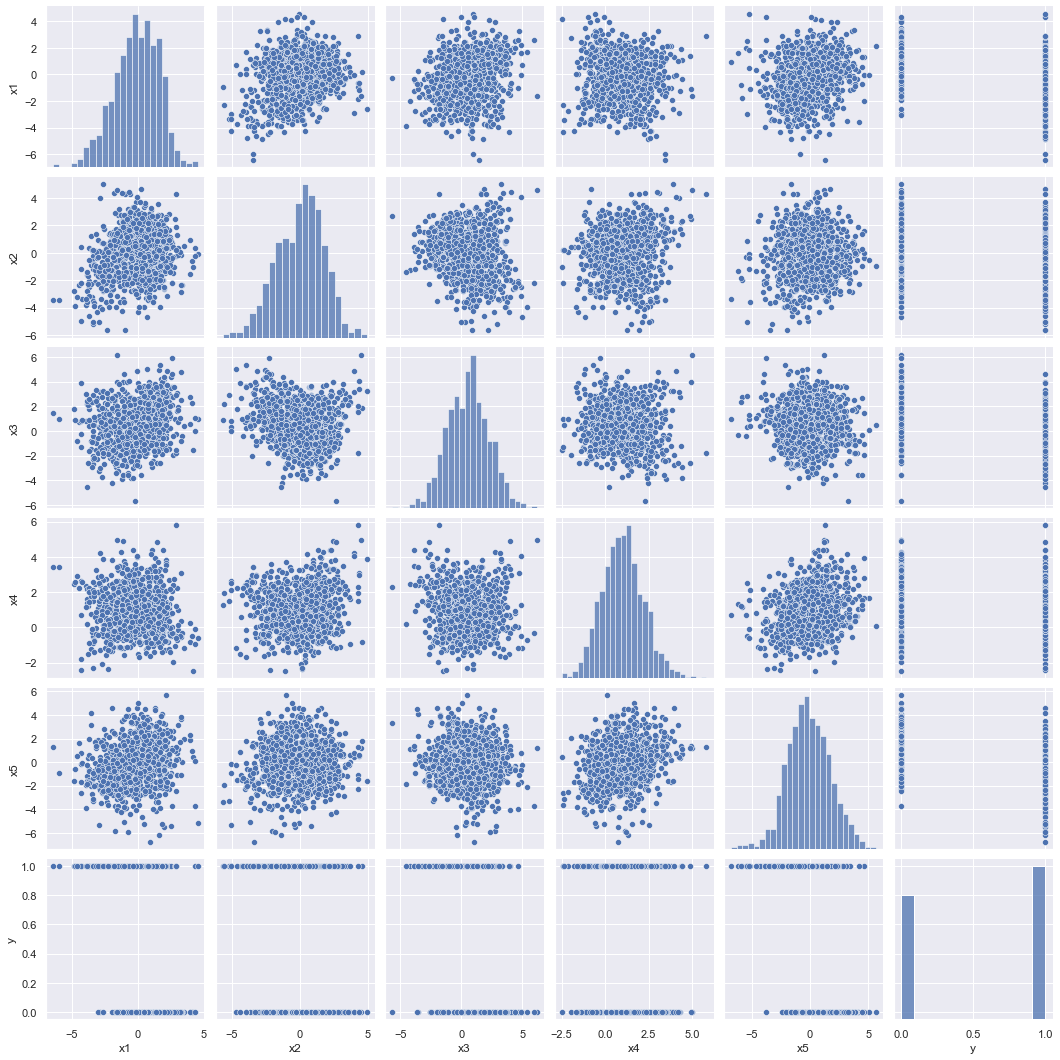

In [5]:
# Pairplot
sns.pairplot(df)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'x1'),
  Text(0, 1.5, 'x2'),
  Text(0, 2.5, 'x3'),
  Text(0, 3.5, 'x4'),
  Text(0, 4.5, 'x5'),
  Text(0, 5.5, 'y')])

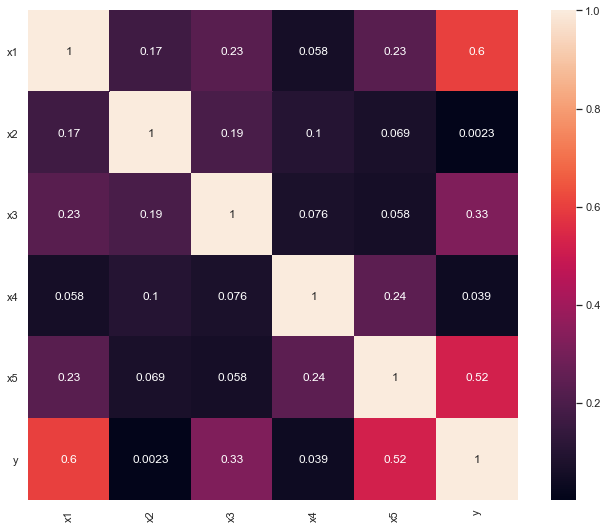

In [6]:
# Correlation matrix
corr_matrix = df.corr().abs()
fig, ax     = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

Using the full data set to perform a logistic regression with 'y' as the response and 'x1', 'x2', 'x3', 'x4', 'x5' variables as predictors.

In [7]:
# Fit model
f = 'y ~ x1 + x2 + x3 + x4 + x5 '
model = sm.Logit.from_formula(formula=f, data=df).fit()
# Display model summary
display(model.summary())


Optimization terminated successfully.
         Current function value: 0.270623
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Sun, 28 Aug 2022   Pseudo R-squ.:                  0.6065
Time:                        18:10:17   Log-Likelihood:                -270.62
converged:                       True   LL-Null:                       -687.73
Covariance Type:            nonrobust   LLR p-value:                4.583e-178
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9387      0.166      5.648      0.000       0.613       1.264
x1            -1.3676      0.103    -13.223      0.000      -1.570      -1.165
x2             0.0992      0.073      1.368      0.171      -0.043       0.241
x3            -0.6928      0.081     -8.595      0.000      -0.851      -0.535
x4            -0.1793      0.104     -1.719      0.086      -0.384       0.025
x5            -1.0969      0.085    -12.940      0.000      -1.263      -0.931
==============================================================================
"""

In [8]:
# Do any of the predictors appear to be statistically significant?
display(pd.DataFrame({'p>|z|': model.pvalues[model.pvalues < 0.05].drop('Intercept')}))

,p>|z|
x1,6.446325e-40
x3,8.339507e-18
x5,2.689092e-38


Confusion Matrix 
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. 
Since we have a binary classification, we would have a 2 x 2 matrix. 

In [9]:
# Example for confusion matrix 

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [10]:
def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df


def positive_observations(y):
    # What percentage of observations are positive?
    proportion_1 = ((y == 1).sum() / len(y))
    pct_1        = np.around(proportion_1*100, decimals=3)
    display(HTML('<p><h4>{}%</h4>of observations are positive</p>'.format(pct_1)))
# Classifier stats
def prior_error_rate(confusion_matrix):
    """The prior probability that a result is positive"""
    return 1 - (np.sum(confusion_mtx[1, :]) / np.sum(confusion_mtx))
def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

def true_positive_rate(confusion_mtx):
    """or sensitivity: the proportion of actual POSITIVES that are correctly identified as such"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[1, :])

def false_negative_rate(confusion_mtx):
    """the proportion of actual POSITIVES that are incorrectly identified as negative"""
    return confusion_mtx[1, 0] / np.sum(confusion_mtx[1, :])

def false_positive_rate(confusion_mtx):
    """the proportion of actual NEGATIVES that are incorrectly identified as positives"""
    return confusion_mtx[0, 1] / np.sum(confusion_mtx[0, :])

def true_negative_rate(confusion_mtx):
    """or specificity: the proportion of actual NEGATIVES that are correctly identified as such"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[0, :])

def positive_predictive_value(confusion_mtx):
    """or precision: the proportion of predicted positives that are correctly predicted"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])

def negative_predictive_value(confusion_mtx):
    """the proportion of predicted negatives that are correctly predicted"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])

def classifier_stats(confusion_mtx):
    return pd.Series({'prior_error_rate': prior_error_rate(confusion_mtx),
                      'total_error_rate': total_error_rate(confusion_mtx),
                      'true_positive_rate (sensitivity)': true_positive_rate(confusion_mtx),
                      'false_negative_rate': false_negative_rate(confusion_mtx),
                      'false_positive_rate': false_positive_rate(confusion_mtx),
                      'true_negative_rate (specificity)': true_negative_rate(confusion_mtx),
                      'positive_predictive_value (precision)': positive_predictive_value(confusion_mtx),
                      'negative_predictive_value': negative_predictive_value(confusion_mtx)})

In [11]:
# Get confusion matrix
confusion_mtx = model.pred_table(threshold=0.5)

In [12]:
# For a nice table
display(confusion_table(confusion_mtx))

,y_pred=0,y_pred=1,Total
,,,
y=0,399.0,49.0,448.0
y=1,52.0,500.0,552.0
Total,451.0,549.0,


In [13]:
# Compute fraction of predictions that are correct
correct_rate = 1 - total_error_rate(confusion_mtx)
print('fraction of predictions correct: \n' + str(np.round(correct_rate, 5)))

fraction of predictions correct: 
0.899


In [14]:
classifier_stats(confusion_mtx)

prior_error_rate                         0.448000
total_error_rate                         0.101000
true_positive_rate (sensitivity)         0.905797
false_negative_rate                      0.094203
false_positive_rate                      0.109375
true_negative_rate (specificity)         0.890625
positive_predictive_value (precision)    0.910747
negative_predictive_value                0.884701
dtype: float64

* Overall the model got 89.9% of predictions correct.

* Our model correctly predicts a high proportion of the true positive observations (90% true positive rate) and a high proportion of true negative results (89% true negative rate).


Now split the dataset into test and training sets and fit the logistic regression model using training data. Then compute the confusion matrix and the overall fraction of correct predictions for test data.

In [16]:
### Split dataset into test and training set ###
df.head()
X=df[['x1', 'x2','x3','x4','x5']]
y=df[['y']]
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.2)
df_train= X_train.join(y_train)
df_test= X_test.join(y_test)

In [17]:
# Fit the logistic regression model using training data 
f    = 'y ~ x1 + x2 + x3 + x4 + x5'
model_2 = sm.Logit.from_formula(formula=f , data=df_train).fit()


Optimization terminated successfully.
         Current function value: 0.269722
         Iterations 8


In [18]:
# Get confusion matrix using test data
threshold     = 0.5
y_pred_logit   = (model_2.predict(df_test) > threshold).astype(int)
confusion_mtx = confusion_matrix(y_test, y_pred_logit)
display(confusion_table(confusion_mtx))

,y_pred=0,y_pred=1,Total
,,,
y=0,81,9,90
y=1,10,100,110
Total,91,109,


In [19]:
# Classifier stats
logit_stats = classifier_stats(confusion_mtx)
logit_stats


prior_error_rate                         0.450000
total_error_rate                         0.095000
true_positive_rate (sensitivity)         0.909091
false_negative_rate                      0.090909
false_positive_rate                      0.100000
true_negative_rate (specificity)         0.900000
positive_predictive_value (precision)    0.917431
negative_predictive_value                0.890110
dtype: float64

In [21]:
# Repeat the same steps for LDA.

# Fit model
lda = LinearDiscriminantAnalysis()
model_3 = lda.fit(X_train, y_train.values.ravel())

# Predict
y_pred_lda = model_3.predict(X_test)

# Confusion table
confusion_mtx = confusion_matrix(y_test, y_pred_lda)
display(confusion_table(confusion_mtx))

LDA_stats = classifier_stats(confusion_mtx)
LDA_stats


,y_pred=0,y_pred=1,Total
,,,
y=0,81,9,90
y=1,11,99,110
Total,92,108,


prior_error_rate                         0.450000
total_error_rate                         0.100000
true_positive_rate (sensitivity)         0.900000
false_negative_rate                      0.100000
false_positive_rate                      0.100000
true_negative_rate (specificity)         0.900000
positive_predictive_value (precision)    0.916667
negative_predictive_value                0.880435
dtype: float64

In [34]:
# Repeat the same steps for QDA
# Fit model
qda = QuadraticDiscriminantAnalysis()
model_4 = qda.fit(X_train, y_train.values.ravel())
y_pred_qda = model_4.predict(X_test)

# Confusion table
confusion_mtx = confusion_matrix(y_test, y_pred_qda)
display(confusion_table(confusion_mtx))

qda_stats = classifier_stats(confusion_mtx)
qda_stats

,y_pred=0,y_pred=1,Total
,,,
y=0,85,5,90
y=1,8,102,110
Total,93,107,


prior_error_rate                         0.450000
total_error_rate                         0.065000
true_positive_rate (sensitivity)         0.927273
false_negative_rate                      0.072727
false_positive_rate                      0.055556
true_negative_rate (specificity)         0.944444
positive_predictive_value (precision)    0.953271
negative_predictive_value                0.913978
dtype: float64

Repeat  the same steps for KNN with K = 1.

Note that distance-based algorithms are affected by the scale of the variables. We do not want our algorithm to be affected by the magnitude of variables. Therefore, we first bring down all the variables to the same scale.


In [38]:
# Scaling response variables 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [39]:
y_train = np.array(df_train['y'])
y_test  = np.array(df_test['y'])

# Fit model
K = 1
model_5 = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
y_pred_knn = model_5.predict(X_test)

# Confusion table
confusion_mtx = confusion_matrix(y_test, y_pred_knn)
display(confusion_table(confusion_mtx))
knn_stats = classifier_stats(confusion_mtx)
knn_stats

,y_pred=0,y_pred=1,Total
,,,
y=0,81,9,90
y=1,9,101,110
Total,90,110,


prior_error_rate                         0.450000
total_error_rate                         0.090000
true_positive_rate (sensitivity)         0.918182
false_negative_rate                      0.081818
false_positive_rate                      0.100000
true_negative_rate (specificity)         0.900000
positive_predictive_value (precision)    0.918182
negative_predictive_value                0.900000
dtype: float64

In [45]:
# Now we evalute performance of these methods 

stats = pd.DataFrame({'logit': logit_stats,
                        'lda'  : LDA_stats,
                        'qda'  : qda_stats,
                        'knn'  : knn_stats}).T
display(stats.T)






,logit,lda,qda,knn
prior_error_rate,0.450000,0.450000,0.450000,0.450000
total_error_rate,0.095000,0.100000,0.065000,0.090000
true_positive_rate (sensitivity),0.909091,0.900000,0.927273,0.918182
false_negative_rate,0.090909,0.100000,0.072727,0.081818
false_positive_rate,0.100000,0.100000,0.055556,0.100000
true_negative_rate (specificity),0.900000,0.900000,0.944444,0.900000
positive_predictive_value (precision),0.917431,0.916667,0.953271,0.918182
negative_predictive_value,0.890110,0.880435,0.913978,0.900000


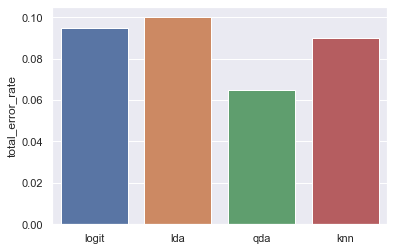

In [46]:
ax = sns.barplot(x=stats.index, y=stats['total_error_rate'])

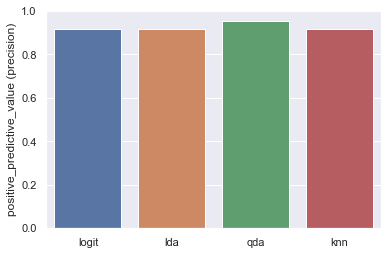

In [47]:
ax = sns.barplot(x=stats.index, y=stats['positive_predictive_value (precision)'])

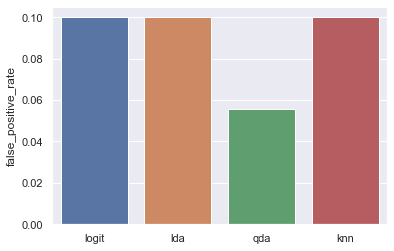

In [48]:
ax = sns.barplot(x=stats.index, y=stats['false_positive_rate'])

Quadratic Discriminant Analysis (QDA) provides the best results in terms of overall error rate. They make the lowest number of incorrect predictions (a total error rate of 6.5%). These models also exhibit the highest precision; a higher proportion of positive predictions are correct.